In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os
import datetime

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [375]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [376]:
file = '2013~2023 한국 기온,습도,풍속.csv'

In [377]:
df = pd.read_csv(file, encoding = 'cp949')

In [378]:
df

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
0,105,강릉,2013-01-01,-1.9,3.8,-6.7,50.6,2.9
1,105,강릉,2013-01-02,-6.0,-1.3,-9.9,29.9,4.4
2,105,강릉,2013-01-03,-7.5,-0.7,-11.1,25.8,4.0
3,105,강릉,2013-01-04,-4.9,1.8,-10.6,31.1,3.2
4,105,강릉,2013-01-05,-1.7,2.8,-5.4,30.4,4.3
...,...,...,...,...,...,...,...,...
62059,184,제주,2023-08-11,29.6,34.1,26.6,64.6,4.0
62060,184,제주,2023-08-12,29.7,33.3,27.2,66.6,2.7
62061,184,제주,2023-08-13,29.2,32.6,26.3,65.3,3.0
62062,184,제주,2023-08-14,28.9,32.3,26.4,69.9,3.4


In [379]:
df_korea = df.drop(['지점번호', '지점명'], axis = 1).groupby(['일시']).mean()
df_korea.head(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2013-01-01,-0.76250,4.43750,-6.21250,73.10000,2.33125
2013-01-02,-4.70000,0.54375,-8.98125,53.29375,3.58750
2013-01-03,-8.09375,-3.99375,-11.26250,48.90000,3.40625
2013-01-04,-6.74375,-1.15000,-11.61875,50.25000,2.03125
2013-01-05,-3.81250,1.75625,-9.41875,57.06250,2.28125
2013-01-06,-2.32500,2.52500,-5.73750,57.04375,1.96875
2013-01-07,-2.00625,3.35000,-6.72500,49.62500,1.95000
2013-01-08,-1.22500,3.76875,-5.28750,50.66250,2.15625
2013-01-09,-4.01875,-0.80625,-7.14375,45.38125,3.41250


In [380]:
df_korea.tail(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2023-08-06,29.40625,33.70000,26.15625,74.78750,1.95000
2023-08-07,29.28750,33.62500,26.05625,74.49375,2.43750
2023-08-08,29.08125,33.11875,25.81875,71.57500,2.92500
2023-08-09,26.48125,28.96250,24.30625,81.06250,3.91875
2023-08-10,23.74375,25.91875,22.36875,88.73125,4.73125
2023-08-11,26.24375,29.97500,22.85625,79.02500,2.83750
2023-08-12,25.86250,29.23125,23.14375,81.25000,1.88125
2023-08-13,26.88750,31.00625,23.51875,77.77500,1.60000
2023-08-14,27.40000,31.66250,24.34375,77.50000,1.77500


In [381]:
df_korea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3879 entries, 2013-01-01 to 2023-08-15
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   평균기온(℃)    3879 non-null   float64
 1   최고기온(℃)    3879 non-null   float64
 2   최저기온(℃)    3879 non-null   float64
 3   평균습도(%rh)  3879 non-null   float64
 4   평균풍속(m/s)  3879 non-null   float64
dtypes: float64(5)
memory usage: 181.8+ KB


In [382]:
df_korea.tail()

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2023-08-11,26.24375,29.97500,22.85625,79.0250,2.83750
2023-08-12,25.86250,29.23125,23.14375,81.2500,1.88125
2023-08-13,26.88750,31.00625,23.51875,77.7750,1.60000
2023-08-14,27.40000,31.66250,24.34375,77.5000,1.77500
2023-08-15,27.23750,31.21250,24.21250,76.5875,2.12500


In [383]:
df_korea = df_korea.reset_index()

In [384]:
df_korea['일시']  = pd.to_datetime(df_korea['일시'])
df_korea.set_index('일시', inplace = True)

Text(0.5, 1.0, '10년간 일별 평균기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


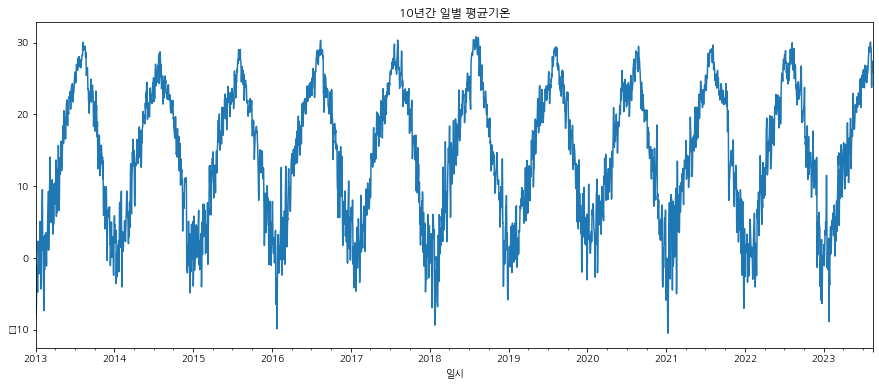

In [385]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균기온(℃)'].plot()
axe.set_title('10년간 일별 평균기온')

Text(0.5, 1.0, '10년간 일별 최저기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


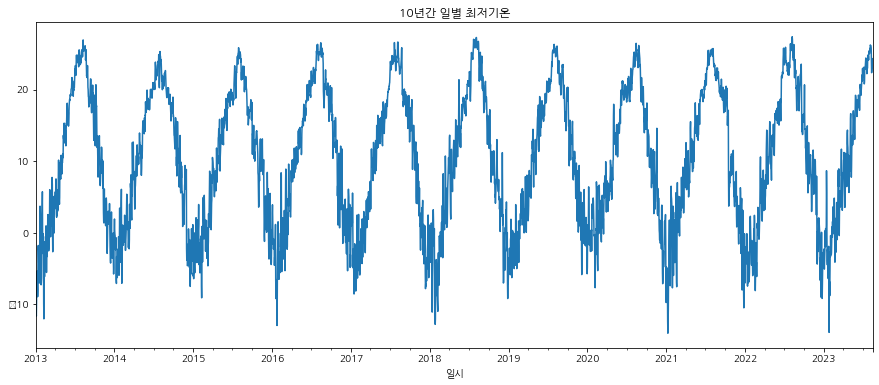

In [386]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['최저기온(℃)'].plot()
axe.set_title('10년간 일별 최저기온')
# 겨울의 병원균을 옮기는 곤충, 동물, 조류들이 동면이 가능한지 보기위한 columns

Text(0.5, 1.0, '10년간 일별 평균습도')

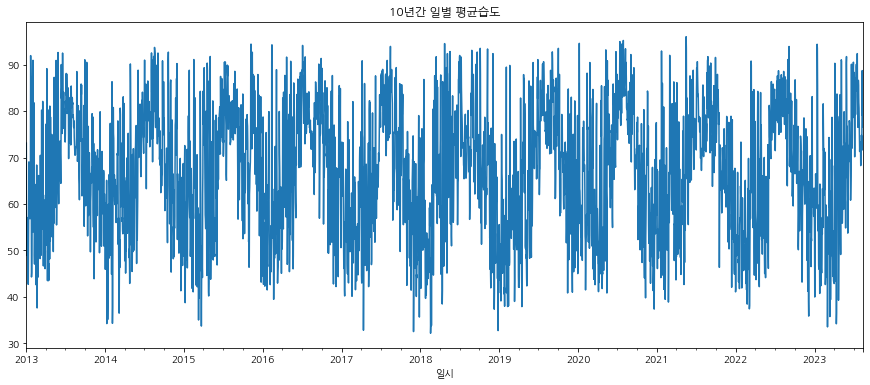

In [387]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균습도(%rh)'].plot()
axe.set_title('10년간 일별 평균습도')

Text(0.5, 1.0, '10년간 일별 평균풍속')

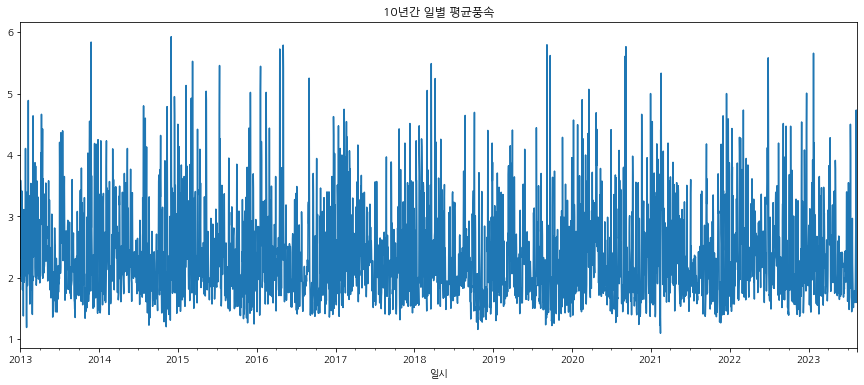

In [388]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균풍속(m/s)'].plot()
axe.set_title('10년간 일별 평균풍속')

## Data Processing

In [389]:
n_col = 1
dataset = df_korea['평균기온(℃)']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(3879, 1)

In [390]:
scaler = MinMaxScaler(feature_range = (0 , 1))
scaled_data = scaler.fit_transform(np.array(data))

## Splitting Data

In [391]:
train_size = int(len(data)*0.75)
test_size = len(data) - train_size
print('Train Size :', train_size, 'Test Size : ', test_size)

Train Size : 2909 Test Size :  970


In [392]:
dataset.iloc[0:train_size, :]

,평균기온(℃)
일시,
2013-01-01,-0.76250
2013-01-02,-4.70000
2013-01-03,-8.09375
2013-01-04,-6.74375
2013-01-05,-3.81250
...,...
2020-12-14,-3.10000
2020-12-15,-4.07500
2020-12-16,-3.58125


In [393]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(2909, 1)

## Creating Data Set

In [394]:
x_train = []
y_train = []
time_step = 60
n_col = 1

for i in range(time_step, len(scaled_data)):
    x_train.append(scaled_data[i-time_step:i, :n_col])
    y_train.append(scaled_data[i, :n_col])
    if i <= time_step:
        print('x_train : ', x_train)
        print('y_train : ', y_train)

x_train :  [array([[0.23578342],
       [0.14050212],
       [0.05837871],
       [0.09104658],
       [0.16197822],
       [0.19797338],
       [0.20568663],
       [0.22459165],
       [0.1569873 ],
       [0.138536  ],
       [0.20689655],
       [0.31049607],
       [0.29567453],
       [0.288415  ],
       [0.26225045],
       [0.27253479],
       [0.20054446],
       [0.21264368],
       [0.29007864],
       [0.33378705],
       [0.37658802],
       [0.36191773],
       [0.33424077],
       [0.29355717],
       [0.16394434],
       [0.14912281],
       [0.16545675],
       [0.24258923],
       [0.34467635],
       [0.39140956],
       [0.4491833 ],
       [0.4845735 ],
       [0.3422565 ],
       [0.28024803],
       [0.32622505],
       [0.30353902],
       [0.29764065],
       [0.1238657 ],
       [0.07637629],
       [0.16560799],
       [0.23744707],
       [0.21264368],
       [0.24001815],
       [0.26255293],
       [0.33242589],
       [0.3076225 ],
       [0.24289171],
 

In [395]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [396]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_col))

In [397]:
x_train.shape, y_train.shape

((3819, 60, 1), (3819, 1))

In [307]:
m_lstm = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(x_train.shape[1], n_col),
                       activation = 'relu',return_sequences = True),
    keras.layers.LSTM(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1)
])
m_lstm.summary()
#kernel_regularizer="l2"

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_9 (LSTM)               (None, 64)                29440     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [29]:
m_lstm.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.001),
             loss = keras.losses.MeanSquaredError(),
             metrics = ['mae'])

In [30]:
h = m_lstm.fit(x_train, y_train, epochs = 50, shuffle=False, batch_size = 32)

Epoch 1/50
120/120 [==============================] - 4s 20ms/step - loss: 0.0923 - mae: 0.2214
Epoch 2/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0101 - mae: 0.0815
Epoch 3/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0080 - mae: 0.0721
Epoch 4/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0068 - mae: 0.0653
Epoch 5/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0063 - mae: 0.0617
Epoch 6/50
120/120 [==============================] - 3s 22ms/step - loss: 0.0059 - mae: 0.0592
Epoch 7/50
120/120 [==============================] - 3s 22ms/step - loss: 0.0054 - mae: 0.0559
Epoch 8/50
120/120 [==============================] - 3s 21ms/step - loss: 0.0050 - mae: 0.0533
Epoch 9/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0051 - mae: 0.0541
Epoch 10/50
120/120 [==============================] - 2s 20ms/step - loss: 0.0049 - mae: 0.0527
Epoch 11/50
120/120 [==================

In [31]:
m_lstm.save('m3_lstm_adam.h5')

In [398]:
m_lstm_Adam = tf.keras.models.load_model('m3_lstm_adam.h5')

Text(0, 0.5, 'Losses')

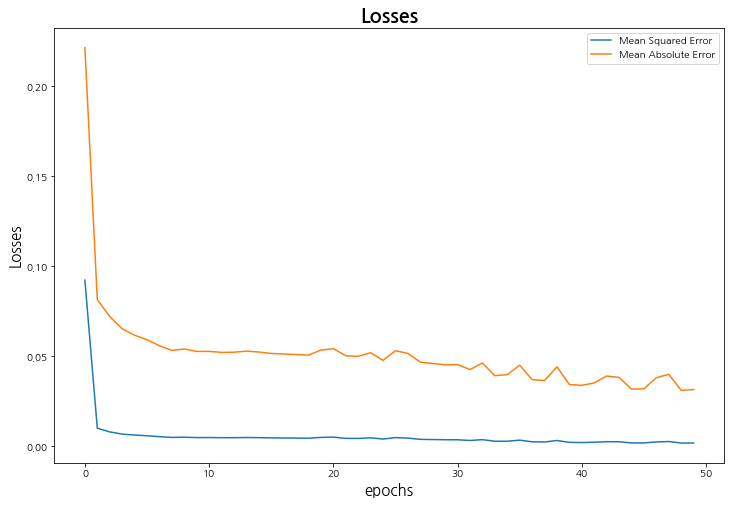

In [33]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [399]:
test_data = scaled_data[train_size - time_step:, :]

x_test = []
y_test = []

for i in range(time_step, len(test_data)):
    #print(time_step, i)
    x_test.append(test_data[i-time_step:i, 0:n_col])
    y_test.append(test_data[i, 0:n_col])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_col))

In [400]:
m_lstm_Adam.evaluate(x_test, y_test)

31/31 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0340


[0.002341053681448102, 0.03404826670885086]

In [401]:
pred = m_lstm_Adam.predict(x_test)

31/31 [==============================] - 0s 6ms/step


In [402]:
pred.shape

(970, 1)

In [403]:
pred = scaler.inverse_transform(pred)
pred.shape

(970, 1)

In [404]:
y_test = scaler.inverse_transform(y_test)

In [405]:
df_pred = pd.DataFrame(data = 
                       {'predict' : pred.flatten(),
                       'actual' : y_test.flatten()})
df_pred

,predict,actual
0,2.780941,-1.42500
1,-0.655055,-0.21250
2,1.755093,1.47500
3,2.403048,3.38125
4,3.974013,5.05000
...,...,...
965,24.857107,26.24375
966,28.440220,25.86250
967,25.981848,26.88750
968,28.531754,27.40000


/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


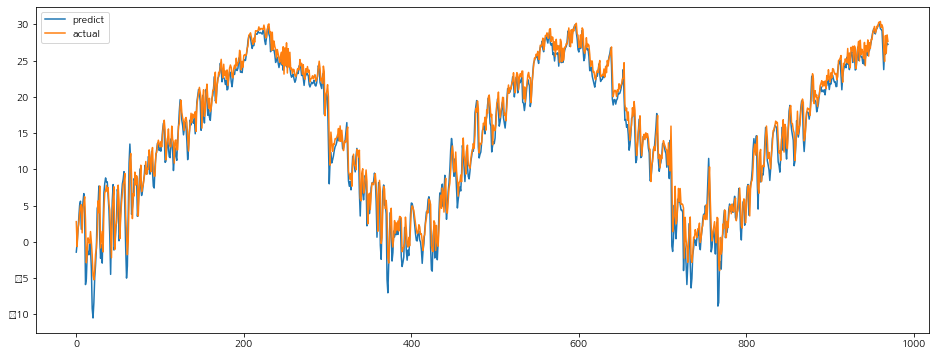

In [406]:
fig, axe = plt.subplots(figsize = (16, 6))
axe.plot(df_pred['actual'])
axe.plot(df_pred['predict'])
axe.legend(['predict', 'actual'])

In [407]:
start_date = datetime.date(2023, 8, 16)
#print('언제의 대한민국 평균 기온을 알고 싶으신가요? (Ex. 2040-01-01, 형태로 적어주세요)')
year, month, day = map(int, input().split('-'))
target_date = datetime.date(year, month, day)

d_day = (target_date - start_date).days
print(d_day)

2024-08-15
365


In [408]:
last_array = []
for i in range(len(x_test[-1])):
    last_array.append(x_test[-1].flatten()[i])
    
len(last_array)

60

In [409]:
for i in range(time_step, d_day):
    print(time_step, i)
    last_ar = np.array(last_array[i-time_step:i])
    print(last_ar)
    array = np.reshape(last_ar, (n_col, last_ar.shape[0], n_col))
    print(array.shape)
    last_array.append(m_lstm_Adam.predict(array)[0,0])
    print(len(last_array))

60 60
[0.82320024 0.84664247 0.85012099 0.85904416 0.81261343 0.76149425
 0.80490018 0.82698125 0.8399879  0.84497883 0.83514822 0.87008469
 0.84694495 0.85344828 0.82879613 0.86358137 0.88384755 0.888536
 0.85269208 0.87265578 0.88944344 0.82758621 0.83064126 0.87341198
 0.90381125 0.85949788 0.88732607 0.87855414 0.87068966 0.87114338
 0.84951603 0.88551119 0.84467635 0.86584997 0.88067151 0.90229885
 0.87598306 0.88808227 0.89337568 0.90804598 0.92075015 0.93965517
 0.95447671 0.96521476 0.95251059 0.94797338 0.96264368 0.9661222
 0.97595281 0.9807925  0.98200242 0.96581972 0.96294616 0.95795523
 0.89503932 0.82879613 0.8892922  0.88006655 0.90486993 0.91727163]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
61
60 61
[0.84664247 0.85012099 0.85904416 0.81261343 0.76149425 0.80490018
 0.82698125 0.8399879  0.84497883 0.83514822 0.87008469 0.84694495
 0.85344828 0.82879613 0.86358137 0.88384755 0.888536   0.85269208
 0.87265578 0.88944344 0.82758621 0.83064126 0.873411

1/1 [==============================] - 0s 16ms/step
72
60 72
[0.84694495 0.85344828 0.82879613 0.86358137 0.88384755 0.888536
 0.85269208 0.87265578 0.88944344 0.82758621 0.83064126 0.87341198
 0.90381125 0.85949788 0.88732607 0.87855414 0.87068966 0.87114338
 0.84951603 0.88551119 0.84467635 0.86584997 0.88067151 0.90229885
 0.87598306 0.88808227 0.89337568 0.90804598 0.92075015 0.93965517
 0.95447671 0.96521476 0.95251059 0.94797338 0.96264368 0.9661222
 0.97595281 0.9807925  0.98200242 0.96581972 0.96294616 0.95795523
 0.89503932 0.82879613 0.8892922  0.88006655 0.90486993 0.91727163
 0.92313325 0.94293576 0.95525354 0.96457571 0.97150505 0.97692102
 0.98128581 0.98505223 0.98855549 0.99193168 0.99524617 0.99855572]
(1, 60, 1)
1/1 [==============================] - 0s 15ms/step
73
60 73
[0.85344828 0.82879613 0.86358137 0.88384755 0.888536   0.85269208
 0.87265578 0.88944344 0.82758621 0.83064126 0.87341198 0.90381125
 0.85949788 0.88732607 0.87855414 0.87068966 0.87114338 0.8495160

1/1 [==============================] - 0s 16ms/step
83
60 83
[0.87341198 0.90381125 0.85949788 0.88732607 0.87855414 0.87068966
 0.87114338 0.84951603 0.88551119 0.84467635 0.86584997 0.88067151
 0.90229885 0.87598306 0.88808227 0.89337568 0.90804598 0.92075015
 0.93965517 0.95447671 0.96521476 0.95251059 0.94797338 0.96264368
 0.9661222  0.97595281 0.9807925  0.98200242 0.96581972 0.96294616
 0.95795523 0.89503932 0.82879613 0.8892922  0.88006655 0.90486993
 0.91727163 0.92313325 0.94293576 0.95525354 0.96457571 0.97150505
 0.97692102 0.98128581 0.98505223 0.98855549 0.99193168 0.99524617
 0.99855572 1.00191247 1.0053668  1.00894105 1.01264095 1.01646841
 1.02040899 1.0244453  1.02856314 1.03274548 1.03695524 1.04115176]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
84
60 84
[0.90381125 0.85949788 0.88732607 0.87855414 0.87068966 0.87114338
 0.84951603 0.88551119 0.84467635 0.86584997 0.88067151 0.90229885
 0.87598306 0.88808227 0.89337568 0.90804598 0.92075015 0.9396

1/1 [==============================] - 0s 16ms/step
94
60 94
[0.88067151 0.90229885 0.87598306 0.88808227 0.89337568 0.90804598
 0.92075015 0.93965517 0.95447671 0.96521476 0.95251059 0.94797338
 0.96264368 0.9661222  0.97595281 0.9807925  0.98200242 0.96581972
 0.96294616 0.95795523 0.89503932 0.82879613 0.8892922  0.88006655
 0.90486993 0.91727163 0.92313325 0.94293576 0.95525354 0.96457571
 0.97150505 0.97692102 0.98128581 0.98505223 0.98855549 0.99193168
 0.99524617 0.99855572 1.00191247 1.0053668  1.00894105 1.01264095
 1.01646841 1.02040899 1.0244453  1.02856314 1.03274548 1.03695524
 1.04115176 1.04533303 1.04947293 1.05352616 1.05749226 1.06139207
 1.06521249 1.06891501 1.07222378 1.07525301 1.07808185 1.08069539]
(1, 60, 1)
1/1 [==============================] - 0s 15ms/step
95
60 95
[0.90229885 0.87598306 0.88808227 0.89337568 0.90804598 0.92075015
 0.93965517 0.95447671 0.96521476 0.95251059 0.94797338 0.96264368
 0.9661222  0.97595281 0.9807925  0.98200242 0.96581972 0.9629

1/1 [==============================] - 0s 17ms/step
105
60 105
[0.94797338 0.96264368 0.9661222  0.97595281 0.9807925  0.98200242
 0.96581972 0.96294616 0.95795523 0.89503932 0.82879613 0.8892922
 0.88006655 0.90486993 0.91727163 0.92313325 0.94293576 0.95525354
 0.96457571 0.97150505 0.97692102 0.98128581 0.98505223 0.98855549
 0.99193168 0.99524617 0.99855572 1.00191247 1.0053668  1.00894105
 1.01264095 1.01646841 1.02040899 1.0244453  1.02856314 1.03274548
 1.03695524 1.04115176 1.04533303 1.04947293 1.05352616 1.05749226
 1.06139207 1.06521249 1.06891501 1.07222378 1.07525301 1.07808185
 1.08069539 1.08314764 1.08542347 1.08753538 1.08947718 1.09124076
 1.09282374 1.09421885 1.0954181  1.09641409 1.09719741 1.09775198]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
106
60 106
[0.96264368 0.9661222  0.97595281 0.9807925  0.98200242 0.96581972
 0.96294616 0.95795523 0.89503932 0.82879613 0.8892922  0.88006655
 0.90486993 0.91727163 0.92313325 0.94293576 0.95525354 0.9

1/1 [==============================] - 0s 15ms/step
116
60 116
[0.8892922  0.88006655 0.90486993 0.91727163 0.92313325 0.94293576
 0.95525354 0.96457571 0.97150505 0.97692102 0.98128581 0.98505223
 0.98855549 0.99193168 0.99524617 0.99855572 1.00191247 1.0053668
 1.00894105 1.01264095 1.01646841 1.02040899 1.0244453  1.02856314
 1.03274548 1.03695524 1.04115176 1.04533303 1.04947293 1.05352616
 1.05749226 1.06139207 1.06521249 1.06891501 1.07222378 1.07525301
 1.07808185 1.08069539 1.08314764 1.08542347 1.08753538 1.08947718
 1.09124076 1.09282374 1.09421885 1.0954181  1.09641409 1.09719741
 1.09775198 1.0980804  1.09819329 1.09811699 1.09787774 1.09727848
 1.0963496  1.0951879  1.09378505 1.09215486 1.0903089  1.08824897]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
117
60 117
[0.88006655 0.90486993 0.91727163 0.92313325 0.94293576 0.95525354
 0.96457571 0.97150505 0.97692102 0.98128581 0.98505223 0.98855549
 0.99193168 0.99524617 0.99855572 1.00191247 1.0053668  1.0

1/1 [==============================] - 0s 17ms/step
128
60 128
[0.9885555 0.9919317 0.9952462 0.9985557 1.0019125 1.0053668 1.008941
 1.012641  1.0164684 1.020409  1.0244453 1.0285631 1.0327455 1.0369552
 1.0411518 1.045333  1.0494729 1.0535262 1.0574923 1.0613921 1.0652125
 1.068915  1.0722238 1.075253  1.0780818 1.0806954 1.0831476 1.0854235
 1.0875354 1.0894772 1.0912408 1.0928237 1.0942189 1.0954181 1.0964141
 1.0971974 1.097752  1.0980804 1.0981933 1.098117  1.0978777 1.0972785
 1.0963496 1.0951879 1.093785  1.0921549 1.0903089 1.088249  1.0859762
 1.0834895 1.0807918 1.0778892 1.0747887 1.0715007 1.068035  1.0644015
 1.0606132 1.0566823 1.0526206 1.0484421]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
129
60 129
[0.9919317 0.9952462 0.9985557 1.0019125 1.0053668 1.008941  1.012641
 1.0164684 1.020409  1.0244453 1.0285631 1.0327455 1.0369552 1.0411518
 1.045333  1.0494729 1.0535262 1.0574923 1.0613921 1.0652125 1.068915
 1.0722238 1.075253  1.0780818 1.0806954 1.

1/1 [==============================] - 0s 16ms/step
140
60 140
[1.0327455 1.0369552 1.0411518 1.045333  1.0494729 1.0535262 1.0574923
 1.0613921 1.0652125 1.068915  1.0722238 1.075253  1.0780818 1.0806954
 1.0831476 1.0854235 1.0875354 1.0894772 1.0912408 1.0928237 1.0942189
 1.0954181 1.0964141 1.0971974 1.097752  1.0980804 1.0981933 1.098117
 1.0978777 1.0972785 1.0963496 1.0951879 1.093785  1.0921549 1.0903089
 1.088249  1.0859762 1.0834895 1.0807918 1.0778892 1.0747887 1.0715007
 1.068035  1.0644015 1.0606132 1.0566823 1.0526206 1.0484421 1.0441679
 1.0398268 1.0354462 1.0310476 1.0266505 1.0222725 1.0179306 1.0136409
 1.0094175 1.005274  1.0012234 0.9972774]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
141
60 141
[1.0369552 1.0411518 1.045333  1.0494729 1.0535262 1.0574923 1.0613921
 1.0652125 1.068915  1.0722238 1.075253  1.0780818 1.0806954 1.0831476
 1.0854235 1.0875354 1.0894772 1.0912408 1.0928237 1.0942189 1.0954181
 1.0964141 1.0971974 1.097752  1.0980804 

1/1 [==============================] - 0s 19ms/step
152
60 152
[1.0780818  1.0806954  1.0831476  1.0854235  1.0875354  1.0894772
 1.0912408  1.0928237  1.0942189  1.0954181  1.0964141  1.0971974
 1.097752   1.0980804  1.0981933  1.098117   1.0978777  1.0972785
 1.0963496  1.0951879  1.093785   1.0921549  1.0903089  1.088249
 1.0859762  1.0834895  1.0807918  1.0778892  1.0747887  1.0715007
 1.068035   1.0644015  1.0606132  1.0566823  1.0526206  1.0484421
 1.0441679  1.0398268  1.0354462  1.0310476  1.0266505  1.0222725
 1.0179306  1.0136409  1.0094175  1.005274   1.0012234  0.9972774
 0.9934474  0.98974395 0.98617667 0.98275495 0.97948784 0.9763831
 0.9734473  0.97068655 0.9681063  0.9657114  0.96350527 0.96149105]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
153
60 153
[1.0806954  1.0831476  1.0854235  1.0875354  1.0894772  1.0912408
 1.0928237  1.0942189  1.0954181  1.0964141  1.0971974  1.097752
 1.0980804  1.0981933  1.098117   1.0978777  1.0972785  1.0963496
 1.09

1/1 [==============================] - 0s 17ms/step
164
60 164
[1.097752   1.0980804  1.0981933  1.098117   1.0978777  1.0972785
 1.0963496  1.0951879  1.093785   1.0921549  1.0903089  1.088249
 1.0859762  1.0834895  1.0807918  1.0778892  1.0747887  1.0715007
 1.068035   1.0644015  1.0606132  1.0566823  1.0526206  1.0484421
 1.0441679  1.0398268  1.0354462  1.0310476  1.0266505  1.0222725
 1.0179306  1.0136409  1.0094175  1.005274   1.0012234  0.9972774
 0.9934474  0.98974395 0.98617667 0.98275495 0.97948784 0.9763831
 0.9734473  0.97068655 0.9681063  0.9657114  0.96350527 0.96149105
 0.9596722  0.95805025 0.95662606 0.95539975 0.9543706  0.9535383
 0.9529026  0.9524622  0.95221436 0.95215577 0.9522827  0.952593  ]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
165
60 165
[1.0980804  1.0981933  1.098117   1.0978777  1.0972785  1.0963496
 1.0951879  1.093785   1.0921549  1.0903089  1.088249   1.0859762
 1.0834895  1.0807918  1.0778892  1.0747887  1.0715007  1.068035
 1.0

1/1 [==============================] - 0s 15ms/step
176
60 176
[1.0859762  1.0834895  1.0807918  1.0778892  1.0747887  1.0715007
 1.068035   1.0644015  1.0606132  1.0566823  1.0526206  1.0484421
 1.0441679  1.0398268  1.0354462  1.0310476  1.0266505  1.0222725
 1.0179306  1.0136409  1.0094175  1.005274   1.0012234  0.9972774
 0.9934474  0.98974395 0.98617667 0.98275495 0.97948784 0.9763831
 0.9734473  0.97068655 0.9681063  0.9657114  0.96350527 0.96149105
 0.9596722  0.95805025 0.95662606 0.95539975 0.9543706  0.9535383
 0.9529026  0.9524622  0.95221436 0.95215577 0.9522827  0.952593
 0.9530836  0.9537497  0.9545868  0.9555896  0.9567526  0.9580729
 0.95954543 0.96116483 0.9629298  0.9648358  0.966875   0.9690416 ]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
177
60 177
[1.0834895  1.0807918  1.0778892  1.0747887  1.0715007  1.068035
 1.0644015  1.0606132  1.0566823  1.0526206  1.0484421  1.0441679
 1.0398268  1.0354462  1.0310476  1.0266505  1.0222725  1.0179306
 1.0

1/1 [==============================] - 0s 14ms/step
188
60 188
[1.0441679  1.0398268  1.0354462  1.0310476  1.0266505  1.0222725
 1.0179306  1.0136409  1.0094175  1.005274   1.0012234  0.9972774
 0.9934474  0.98974395 0.98617667 0.98275495 0.97948784 0.9763831
 0.9734473  0.97068655 0.9681063  0.9657114  0.96350527 0.96149105
 0.9596722  0.95805025 0.95662606 0.95539975 0.9543706  0.9535383
 0.9529026  0.9524622  0.95221436 0.95215577 0.9522827  0.952593
 0.9530836  0.9537497  0.9545868  0.9555896  0.9567526  0.9580729
 0.95954543 0.96116483 0.9629298  0.9648358  0.966875   0.9690416
 0.9713278  0.97372556 0.97622734 0.9788247  0.98151    0.9842753
 0.9871141  0.99001926 0.9929824  0.9959954  0.9990505  1.0021398 ]
(1, 60, 1)
1/1 [==============================] - 0s 14ms/step
189
60 189
[1.0398268  1.0354462  1.0310476  1.0266505  1.0222725  1.0179306
 1.0136409  1.0094175  1.005274   1.0012234  0.9972774  0.9934474
 0.98974395 0.98617667 0.98275495 0.97948784 0.9763831  0.9734473
 0.

1/1 [==============================] - 0s 16ms/step
200
60 200
[0.9934474  0.98974395 0.98617667 0.98275495 0.97948784 0.9763831
 0.9734473  0.97068655 0.9681063  0.9657114  0.96350527 0.96149105
 0.9596722  0.95805025 0.95662606 0.95539975 0.9543706  0.9535383
 0.9529026  0.9524622  0.95221436 0.95215577 0.9522827  0.952593
 0.9530836  0.9537497  0.9545868  0.9555896  0.9567526  0.9580729
 0.95954543 0.96116483 0.9629298  0.9648358  0.966875   0.9690416
 0.9713278  0.97372556 0.97622734 0.9788247  0.98151    0.9842753
 0.9871141  0.99001926 0.9929824  0.9959954  0.9990505  1.0021398
 1.0052551  1.0083884  1.0115322  1.0146787  1.0178202  1.020948
 1.0240533  1.027127   1.0301608  1.0331457  1.0360724  1.0389335 ]
(1, 60, 1)
1/1 [==============================] - 0s 17ms/step
201
60 201
[0.98974395 0.98617667 0.98275495 0.97948784 0.9763831  0.9734473
 0.97068655 0.9681063  0.9657114  0.96350527 0.96149105 0.9596722
 0.95805025 0.95662606 0.95539975 0.9543706  0.9535383  0.9529026
 0.9

1/1 [==============================] - 0s 17ms/step
212
60 212
[0.9596722  0.95805025 0.95662606 0.95539975 0.9543706  0.9535383
 0.9529026  0.9524622  0.95221436 0.95215577 0.9522827  0.952593
 0.9530836  0.9537497  0.9545868  0.9555896  0.9567526  0.9580729
 0.95954543 0.96116483 0.9629298  0.9648358  0.966875   0.9690416
 0.9713278  0.97372556 0.97622734 0.9788247  0.98151    0.9842753
 0.9871141  0.99001926 0.9929824  0.9959954  0.9990505  1.0021398
 1.0052551  1.0083884  1.0115322  1.0146787  1.0178202  1.020948
 1.0240533  1.027127   1.0301608  1.0331457  1.0360724  1.0389335
 1.041728   1.0444525  1.0470974  1.0496517  1.052106   1.0544517
 1.0566815  1.0587883  1.0607653  1.0626063  1.0643044  1.0658538 ]
(1, 60, 1)
1/1 [==============================] - 0s 15ms/step
213
60 213
[0.95805025 0.95662606 0.95539975 0.9543706  0.9535383  0.9529026
 0.9524622  0.95221436 0.95215577 0.9522827  0.952593   0.9530836
 0.9537497  0.9545868  0.9555896  0.9567526  0.9580729  0.95954543
 0.9

1/1 [==============================] - 0s 16ms/step
224
60 224
[0.9530836  0.9537497  0.9545868  0.9555896  0.9567526  0.9580729
 0.95954543 0.96116483 0.9629298  0.9648358  0.966875   0.9690416
 0.9713278  0.97372556 0.97622734 0.9788247  0.98151    0.9842753
 0.9871141  0.99001926 0.9929824  0.9959954  0.9990505  1.0021398
 1.0052551  1.0083884  1.0115322  1.0146787  1.0178202  1.020948
 1.0240533  1.027127   1.0301608  1.0331457  1.0360724  1.0389335
 1.041728   1.0444525  1.0470974  1.0496517  1.052106   1.0544517
 1.0566815  1.0587883  1.0607653  1.0626063  1.0643044  1.0658538
 1.0672494  1.0684861  1.0695599  1.0704689  1.071216   1.071804
 1.0722343  1.0725054  1.0726156  1.0725639  1.072349   1.0719703 ]
(1, 60, 1)
1/1 [==============================] - 0s 17ms/step
225
60 225
[0.9537497  0.9545868  0.9555896  0.9567526  0.9580729  0.95954543
 0.96116483 0.9629298  0.9648358  0.966875   0.9690416  0.9713278
 0.97372556 0.97622734 0.9788247  0.98151    0.9842753  0.9871141
 0.9

1/1 [==============================] - 0s 16ms/step
236
60 236
[0.9713278  0.97372556 0.97622734 0.9788247  0.98151    0.9842753
 0.9871141  0.99001926 0.9929824  0.9959954  0.9990505  1.0021398
 1.0052551  1.0083884  1.0115322  1.0146787  1.0178202  1.020948
 1.0240533  1.027127   1.0301608  1.0331457  1.0360724  1.0389335
 1.041728   1.0444525  1.0470974  1.0496517  1.052106   1.0544517
 1.0566815  1.0587883  1.0607653  1.0626063  1.0643044  1.0658538
 1.0672494  1.0684861  1.0695599  1.0704689  1.071216   1.071804
 1.0722343  1.0725054  1.0726156  1.0725639  1.072349   1.0719703
 1.0714271  1.0707183  1.0698441  1.0688055  1.0676043  1.066244
 1.0647273  1.0630572  1.0612378  1.0592741  1.0571724  1.0549418 ]
(1, 60, 1)
1/1 [==============================] - 0s 17ms/step
237
60 237
[0.97372556 0.97622734 0.9788247  0.98151    0.9842753  0.9871141
 0.99001926 0.9929824  0.9959954  0.9990505  1.0021398  1.0052551
 1.0083884  1.0115322  1.0146787  1.0178202  1.020948   1.0240533
 1.027

1/1 [==============================] - 0s 16ms/step
248
60 248
[1.0052551 1.0083884 1.0115322 1.0146787 1.0178202 1.020948  1.0240533
 1.027127  1.0301608 1.0331457 1.0360724 1.0389335 1.041728  1.0444525
 1.0470974 1.0496517 1.052106  1.0544517 1.0566815 1.0587883 1.0607653
 1.0626063 1.0643044 1.0658538 1.0672494 1.0684861 1.0695599 1.0704689
 1.071216  1.071804  1.0722343 1.0725054 1.0726156 1.0725639 1.072349
 1.0719703 1.0714271 1.0707183 1.0698441 1.0688055 1.0676043 1.066244
 1.0647273 1.0630572 1.0612378 1.0592741 1.0571724 1.0549418 1.052594
 1.0501418 1.0475967 1.0449716 1.0422771 1.0395231 1.0367205 1.033879
 1.0310094 1.0281231 1.0252312 1.0223435]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
249
60 249
[1.0083884 1.0115322 1.0146787 1.0178202 1.020948  1.0240533 1.027127
 1.0301608 1.0331457 1.0360724 1.0389335 1.041728  1.0444525 1.0470974
 1.0496517 1.052106  1.0544517 1.0566815 1.0587883 1.0607653 1.0626063
 1.0643044 1.0658538 1.0672494 1.0684861 1.06

1/1 [==============================] - 0s 14ms/step
260
60 260
[1.041728   1.0444525  1.0470974  1.0496517  1.052106   1.0544517
 1.0566815  1.0587883  1.0607653  1.0626063  1.0643044  1.0658538
 1.0672494  1.0684861  1.0695599  1.0704689  1.071216   1.071804
 1.0722343  1.0725054  1.0726156  1.0725639  1.072349   1.0719703
 1.0714271  1.0707183  1.0698441  1.0688055  1.0676043  1.066244
 1.0647273  1.0630572  1.0612378  1.0592741  1.0571724  1.0549418
 1.052594   1.0501418  1.0475967  1.0449716  1.0422771  1.0395231
 1.0367205  1.033879   1.0310094  1.0281231  1.0252312  1.0223435
 1.0194694  1.0166186  1.0138009  1.0110258  1.0083019  1.0056378
 1.0030417  1.0005218  0.998085   0.99573827 0.9934881  0.99134034]
(1, 60, 1)
1/1 [==============================] - 0s 14ms/step
261
60 261
[1.0444525  1.0470974  1.0496517  1.052106   1.0544517  1.0566815
 1.0587883  1.0607653  1.0626063  1.0643044  1.0658538  1.0672494
 1.0684861  1.0695599  1.0704689  1.071216   1.071804   1.0722343
 1.07

1/1 [==============================] - 0s 16ms/step
272
60 272
[1.0672494  1.0684861  1.0695599  1.0704689  1.071216   1.071804
 1.0722343  1.0725054  1.0726156  1.0725639  1.072349   1.0719703
 1.0714271  1.0707183  1.0698441  1.0688055  1.0676043  1.066244
 1.0647273  1.0630572  1.0612378  1.0592741  1.0571724  1.0549418
 1.052594   1.0501418  1.0475967  1.0449716  1.0422771  1.0395231
 1.0367205  1.033879   1.0310094  1.0281231  1.0252312  1.0223435
 1.0194694  1.0166186  1.0138009  1.0110258  1.0083019  1.0056378
 1.0030417  1.0005218  0.998085   0.99573827 0.9934881  0.99134034
 0.98930025 0.98737305 0.9855631  0.98387444 0.98231065 0.98087484
 0.9795698  0.97839713 0.97735816 0.97645384 0.97568476 0.9750511 ]
(1, 60, 1)
1/1 [==============================] - 0s 15ms/step
273
60 273
[1.0684861  1.0695599  1.0704689  1.071216   1.071804   1.0722343
 1.0725054  1.0726156  1.0725639  1.072349   1.0719703  1.0714271
 1.0707183  1.0698441  1.0688055  1.0676043  1.066244   1.0647273
 1.

1/1 [==============================] - 0s 16ms/step
284
60 284
[1.0714271  1.0707183  1.0698441  1.0688055  1.0676043  1.066244
 1.0647273  1.0630572  1.0612378  1.0592741  1.0571724  1.0549418
 1.052594   1.0501418  1.0475967  1.0449716  1.0422771  1.0395231
 1.0367205  1.033879   1.0310094  1.0281231  1.0252312  1.0223435
 1.0194694  1.0166186  1.0138009  1.0110258  1.0083019  1.0056378
 1.0030417  1.0005218  0.998085   0.99573827 0.9934881  0.99134034
 0.98930025 0.98737305 0.9855631  0.98387444 0.98231065 0.98087484
 0.9795698  0.97839713 0.97735816 0.97645384 0.97568476 0.9750511
 0.9745524  0.974188   0.9739582  0.9738621  0.9738978  0.97406274
 0.97435427 0.97477007 0.9753074  0.9759634  0.9767359  0.97762156]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
285
60 285
[1.0707183  1.0698441  1.0688055  1.0676043  1.066244   1.0647273
 1.0630572  1.0612378  1.0592741  1.0571724  1.0549418  1.052594
 1.0501418  1.0475967  1.0449716  1.0422771  1.0395231  1.0367205
 1

1/1 [==============================] - 0s 14ms/step
296
60 296
[1.052594   1.0501418  1.0475967  1.0449716  1.0422771  1.0395231
 1.0367205  1.033879   1.0310094  1.0281231  1.0252312  1.0223435
 1.0194694  1.0166186  1.0138009  1.0110258  1.0083019  1.0056378
 1.0030417  1.0005218  0.998085   0.99573827 0.9934881  0.99134034
 0.98930025 0.98737305 0.9855631  0.98387444 0.98231065 0.98087484
 0.9795698  0.97839713 0.97735816 0.97645384 0.97568476 0.9750511
 0.9745524  0.974188   0.9739582  0.9738621  0.9738978  0.97406274
 0.97435427 0.97477007 0.9753074  0.9759634  0.9767359  0.97762156
 0.97861624 0.9797156  0.9809154  0.98221135 0.9835989  0.9850736
 0.98663145 0.9882682  0.98997855 0.99175704 0.99359864 0.99549776]
(1, 60, 1)
1/1 [==============================] - 0s 15ms/step
297
60 297
[1.0501418  1.0475967  1.0449716  1.0422771  1.0395231  1.0367205
 1.033879   1.0310094  1.0281231  1.0252312  1.0223435  1.0194694
 1.0166186  1.0138009  1.0110258  1.0083019  1.0056378  1.0030417

1/1 [==============================] - 0s 16ms/step
308
60 308
[1.0194694  1.0166186  1.0138009  1.0110258  1.0083019  1.0056378
 1.0030417  1.0005218  0.998085   0.99573827 0.9934881  0.99134034
 0.98930025 0.98737305 0.9855631  0.98387444 0.98231065 0.98087484
 0.9795698  0.97839713 0.97735816 0.97645384 0.97568476 0.9750511
 0.9745524  0.974188   0.9739582  0.9738621  0.9738978  0.97406274
 0.97435427 0.97477007 0.9753074  0.9759634  0.9767359  0.97762156
 0.97861624 0.9797156  0.9809154  0.98221135 0.9835989  0.9850736
 0.98663145 0.9882682  0.98997855 0.99175704 0.99359864 0.99549776
 0.9974494  0.9994481  1.0014877  1.0035627  1.0056676  1.0077971
 1.0099454  1.0121064  1.0142746  1.0164438  1.018608   1.020761  ]
(1, 60, 1)
1/1 [==============================] - 0s 15ms/step
309
60 309
[1.0166186  1.0138009  1.0110258  1.0083019  1.0056378  1.0030417
 1.0005218  0.998085   0.99573827 0.9934881  0.99134034 0.98930025
 0.98737305 0.9855631  0.98387444 0.98231065 0.98087484 0.97956

1/1 [==============================] - 0s 14ms/step
320
60 320
[0.98930025 0.98737305 0.9855631  0.98387444 0.98231065 0.98087484
 0.9795698  0.97839713 0.97735816 0.97645384 0.97568476 0.9750511
 0.9745524  0.974188   0.9739582  0.9738621  0.9738978  0.97406274
 0.97435427 0.97477007 0.9753074  0.9759634  0.9767359  0.97762156
 0.97861624 0.9797156  0.9809154  0.98221135 0.9835989  0.9850736
 0.98663145 0.9882682  0.98997855 0.99175704 0.99359864 0.99549776
 0.9974494  0.9994481  1.0014877  1.0035627  1.0056676  1.0077971
 1.0099454  1.0121064  1.0142746  1.0164438  1.018608   1.020761
 1.0228974  1.0250107  1.0270953  1.0291457  1.0311558  1.0331198
 1.0350322  1.0368879  1.0386814  1.0404068  1.0420597  1.043635  ]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
321
60 321
[0.98737305 0.9855631  0.98387444 0.98231065 0.98087484 0.9795698
 0.97839713 0.97735816 0.97645384 0.97568476 0.9750511  0.9745524
 0.974188   0.9739582  0.9738621  0.9738978  0.97406274 0.97435427

1/1 [==============================] - 0s 16ms/step
332
60 332
[0.9745524  0.974188   0.9739582  0.9738621  0.9738978  0.97406274
 0.97435427 0.97477007 0.9753074  0.9759634  0.9767359  0.97762156
 0.97861624 0.9797156  0.9809154  0.98221135 0.9835989  0.9850736
 0.98663145 0.9882682  0.98997855 0.99175704 0.99359864 0.99549776
 0.9974494  0.9994481  1.0014877  1.0035627  1.0056676  1.0077971
 1.0099454  1.0121064  1.0142746  1.0164438  1.018608   1.020761
 1.0228974  1.0250107  1.0270953  1.0291457  1.0311558  1.0331198
 1.0350322  1.0368879  1.0386814  1.0404068  1.0420597  1.043635
 1.0451281  1.0465344  1.0478494  1.049069   1.0501896  1.0512074
 1.0521195  1.0529233  1.0536158  1.0541946  1.0546577  1.0550046 ]
(1, 60, 1)
1/1 [==============================] - 0s 15ms/step
333
60 333
[0.974188   0.9739582  0.9738621  0.9738978  0.97406274 0.97435427
 0.97477007 0.9753074  0.9759634  0.9767359  0.97762156 0.97861624
 0.9797156  0.9809154  0.98221135 0.9835989  0.9850736  0.98663145

1/1 [==============================] - 0s 17ms/step
344
60 344
[0.97861624 0.9797156  0.9809154  0.98221135 0.9835989  0.9850736
 0.98663145 0.9882682  0.98997855 0.99175704 0.99359864 0.99549776
 0.9974494  0.9994481  1.0014877  1.0035627  1.0056676  1.0077971
 1.0099454  1.0121064  1.0142746  1.0164438  1.018608   1.020761
 1.0228974  1.0250107  1.0270953  1.0291457  1.0311558  1.0331198
 1.0350322  1.0368879  1.0386814  1.0404068  1.0420597  1.043635
 1.0451281  1.0465344  1.0478494  1.049069   1.0501896  1.0512074
 1.0521195  1.0529233  1.0536158  1.0541946  1.0546577  1.0550046
 1.0552342  1.0553457  1.0553384  1.0552126  1.0549688  1.0546079
 1.0541309  1.0535398  1.0528374  1.0520271  1.0511122  1.0500957 ]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
345
60 345
[0.9797156  0.9809154  0.98221135 0.9835989  0.9850736  0.98663145
 0.9882682  0.98997855 0.99175704 0.99359864 0.99549776 0.9974494
 0.9994481  1.0014877  1.0035627  1.0056676  1.0077971  1.0099454
 1.

1/1 [==============================] - 0s 17ms/step
356
60 356
[0.9974494 0.9994481 1.0014877 1.0035627 1.0056676 1.0077971 1.0099454
 1.0121064 1.0142746 1.0164438 1.018608  1.020761  1.0228974 1.0250107
 1.0270953 1.0291457 1.0311558 1.0331198 1.0350322 1.0368879 1.0386814
 1.0404068 1.0420597 1.043635  1.0451281 1.0465344 1.0478494 1.049069
 1.0501896 1.0512074 1.0521195 1.0529233 1.0536158 1.0541946 1.0546577
 1.0550046 1.0552342 1.0553457 1.0553384 1.0552126 1.0549688 1.0546079
 1.0541309 1.0535398 1.0528374 1.0520271 1.0511122 1.0500957 1.0489813
 1.0477732 1.0464758 1.0450937 1.0436325 1.0420982 1.040497  1.0388346
 1.0371168 1.0353502 1.0335412 1.0316964]
(1, 60, 1)
1/1 [==============================] - 0s 16ms/step
357
60 357
[0.9994481 1.0014877 1.0035627 1.0056676 1.0077971 1.0099454 1.0121064
 1.0142746 1.0164438 1.018608  1.020761  1.0228974 1.0250107 1.0270953
 1.0291457 1.0311558 1.0331198 1.0350322 1.0368879 1.0386814 1.0404068
 1.0420597 1.043635  1.0451281 1.0465344 

In [417]:
test_pred = np.array(last_array).reshape(365,1)

array([[23.5125    ],
       [24.48125   ],
       [24.625     ],
       [24.99375   ],
       [23.075     ],
       [20.9625    ],
       [22.75625   ],
       [23.66875   ],
       [24.20625   ],
       [24.4125    ],
       [24.00625   ],
       [25.45      ],
       [24.49375   ],
       [24.7625    ],
       [23.74375   ],
       [25.18125   ],
       [26.01875   ],
       [26.2125    ],
       [24.73125   ],
       [25.55625   ],
       [26.25      ],
       [23.69375   ],
       [23.82      ],
       [25.5875    ],
       [26.84375   ],
       [25.0125    ],
       [26.1625    ],
       [25.8       ],
       [25.475     ],
       [25.49375   ],
       [24.6       ],
       [26.0875    ],
       [24.4       ],
       [25.275     ],
       [25.8875    ],
       [26.78125   ],
       [25.69375   ],
       [26.19375   ],
       [26.4125    ],
       [27.01875   ],
       [27.54375   ],
       [28.325     ],
       [28.9375    ],
       [29.38125   ],
       [28.85625   ],
       [28

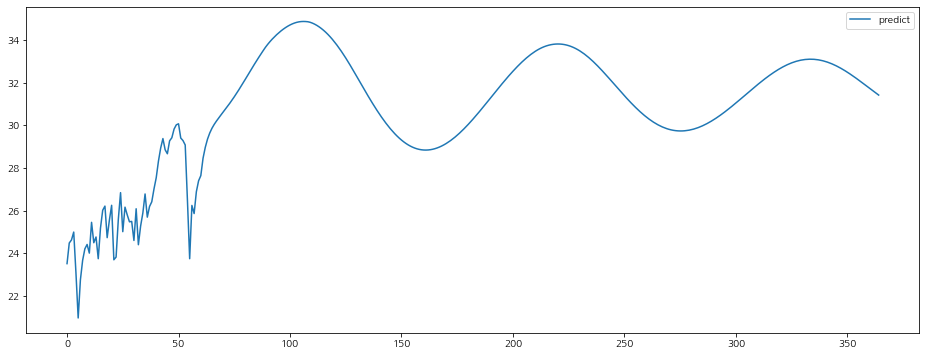

In [419]:
fig, axe = plt.subplots(figsize = (16, 6))
#axe.plot(df_pred['actual'])
axe.plot(scaler.inverse_transform(test_pred))
axe.legend(['predict', 'actual'])

In [321]:
last_array = []
for i in range(len(x_test[-1])):
    last_array.append(x_test[-1].flatten()[i])

last_array[0:60]

[0.8232002419842709,
 0.8466424682395642,
 0.8501209921355111,
 0.8590441621294614,
 0.8126134301270416,
 0.7614942528735631,
 0.8049001814882032,
 0.8269812462189956,
 0.8399879007864488,
 0.8449788263762854,
 0.8351482153660011,
 0.8700846944948577,
 0.8469449485783422,
 0.8534482758620688,
 0.8287961282516635,
 0.8635813672111311,
 0.8838475499092557,
 0.8885359951603145,
 0.8526920750151239,
 0.8726557773744705,
 0.8894434361766483,
 0.8275862068965516,
 0.8306412583182092,
 0.8734119782214155,
 0.9038112522686024,
 0.8594978826376284,
 0.8873260738052026,
 0.8785541439806411,
 0.8706896551724137,
 0.8711433756805806,
 0.8495160314579552,
 0.8855111917725346,
 0.8446763460375074,
 0.8658499697519659,
 0.8806715063520869,
 0.9022988505747125,
 0.8759830611010283,
 0.8880822746521475,
 0.8933756805807621,
 0.9080459770114941,
 0.9207501512401692,
 0.9396551724137929,
 0.9544767090139139,
 0.9652147610405323,
 0.9525105868118571,
 0.9479733817301874,
 0.9626436781609193,
 0.9661222020

0.8466424682395642

array([[0.82320024],
       [0.84664247],
       [0.85012099],
       [0.85904416],
       [0.81261343],
       [0.76149425],
       [0.80490018],
       [0.82698125],
       [0.8399879 ],
       [0.84497883],
       [0.83514822],
       [0.87008469],
       [0.84694495],
       [0.85344828],
       [0.82879613],
       [0.86358137],
       [0.88384755],
       [0.888536  ],
       [0.85269208],
       [0.87265578],
       [0.88944344],
       [0.82758621],
       [0.83064126],
       [0.87341198],
       [0.90381125],
       [0.85949788],
       [0.88732607],
       [0.87855414],
       [0.87068966],
       [0.87114338],
       [0.84951603],
       [0.88551119],
       [0.84467635],
       [0.86584997],
       [0.88067151],
       [0.90229885],
       [0.87598306],
       [0.88808227],
       [0.89337568],
       [0.90804598],
       [0.92075015],
       [0.93965517],
       [0.95447671],
       [0.96521476],
       [0.95251059],
       [0.94797338],
       [0.96264368],
       [0.966

In [330]:
m_lstm_Adam.predict()

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.float64).